In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [20]:
# Read the csv file into a pandas DataFrame

movies_data = pd.read_csv('Resources/movies_cleaned.csv')
movies_data


,Unnamed: 0,profit,budget,company,country,director,genre,gross,name,rating,released,runtime,star,writer,year,ROI_pct,release_dt
0,0,44287414,8000000,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414,Stand by Me,R,8/22/1986,89,Wil Wheaton,Stephen King,1986,553.592675,1986-08-22
1,1,64136369,6000000,Paramount Pictures,USA,John Hughes,Comedy,70136369,Ferris Bueller's Day Off,PG-13,6/11/1986,103,Matthew Broderick,John Hughes,1986,1068.939483,1986-06-11
2,2,164800601,15000000,Paramount Pictures,USA,Tony Scott,Action,179800601,Top Gun,PG,5/16/1986,110,Tom Cruise,Jim Cash,1986,1098.670673,1986-05-16
3,3,66660248,18500000,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248,Aliens,R,7/18/1986,137,Sigourney Weaver,James Cameron,1986,360.325665,1986-07-18
4,4,9564613,9000000,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613,Flight of the Navigator,PG,8/1/1986,90,Joey Cramer,Mark H. Baker,1986,106.273478,1986-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4633,6808,11013564,3000000,Westerly Films,Ireland,Whit Stillman,Comedy,14013564,Love & Friendship,PG,6/3/2016,90,Kate Beckinsale,Whit Stillman,2016,367.118800,2016-06-03
4634,6809,-2783128,3800000,Sycamore Pictures,USA,John Krasinski,Comedy,1016872,The Hollars,PG-13,8/26/2016,88,Sharlto Copley,Jim Strouse,2016,-73.240211,2016-08-26
4635,6811,11485196,8500000,CBS Films,USA,Steve Carr,Animation,19985196,Middle School: The Worst Years of My Life,PG,10/7/2016,92,Griffin Gluck,Chris Bowman,2016,135.119953,2016-10-07
4636,6814,16874745,20000000,LD Entertainment,USA,Kevin Reynolds,Action,36874745,Risen,PG-13,2/19/2016,107,Joseph Fiennes,Kevin Reynolds,2016,84.373725,2016-02-19


In [21]:
movies_data.columns

Index(['Unnamed: 0', 'profit', 'budget', 'company', 'country', 'director',
       'genre', 'gross', 'name', 'rating', 'released', 'runtime', 'star',
       'writer', 'year', 'ROI_pct', 'release_dt'],
      dtype='object')

In [22]:
selected_columns= ['company', 'country', 'director','genre','name', 'rating','star','writer',]
categorical_df = movies_data[selected_columns]

In [23]:
oe = OrdinalEncoder()
numeric_conversion = pd.DataFrame(oe.fit_transform(categorical_df),columns=selected_columns)
numeric_conversion

,company,country,director,genre,name,rating,star,writer
0,399.0,44.0,1507.0,1.0,3172.0,6.0,1582.0,2530.0
1,1019.0,44.0,881.0,4.0,1237.0,5.0,1055.0,1324.0
2,1019.0,44.0,1822.0,0.0,4246.0,4.0,1516.0,1240.0
3,1261.0,44.0,717.0,0.0,193.0,6.0,1417.0,1098.0
4,1298.0,44.0,1456.0,1.0,1274.0,4.0,776.0,1721.0
...,...,...,...,...,...,...,...,...
4633,1308.0,20.0,1857.0,4.0,2068.0,4.0,874.0,2788.0
4634,1213.0,44.0,884.0,4.0,3684.0,5.0,1400.0,1250.0
4635,282.0,44.0,1688.0,2.0,2235.0,4.0,557.0,385.0
4636,813.0,44.0,1021.0,0.0,2833.0,5.0,827.0,1541.0


In [24]:
movies_data[["budget","runtime","ROI_pct"]]

,budget,runtime,ROI_pct
0,8000000,89,553.592675
1,6000000,103,1068.939483
2,15000000,110,1098.670673
3,18500000,137,360.325665
4,9000000,90,106.273478
...,...,...,...
4633,3000000,90,367.118800
4634,3800000,88,-73.240211
4635,8500000,92,135.119953
4636,20000000,107,84.373725


In [25]:
movies_df=movies_data[["budget","runtime","ROI_pct"]]
#movies_df.merge(numeric_conversion)

In [26]:
movies_df['index']=movies_df.index
numeric_conversion['index']=numeric_conversion.index

<ipython-input-26-19e6a81294f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['index']=movies_df.index


In [27]:
movies_df = movies_df.merge(numeric_conversion)
movies_df

,budget,runtime,ROI_pct,index,company,country,director,genre,name,rating,star,writer
0,8000000,89,553.592675,0,399.0,44.0,1507.0,1.0,3172.0,6.0,1582.0,2530.0
1,6000000,103,1068.939483,1,1019.0,44.0,881.0,4.0,1237.0,5.0,1055.0,1324.0
2,15000000,110,1098.670673,2,1019.0,44.0,1822.0,0.0,4246.0,4.0,1516.0,1240.0
3,18500000,137,360.325665,3,1261.0,44.0,717.0,0.0,193.0,6.0,1417.0,1098.0
4,9000000,90,106.273478,4,1298.0,44.0,1456.0,1.0,1274.0,4.0,776.0,1721.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4633,3000000,90,367.118800,4633,1308.0,20.0,1857.0,4.0,2068.0,4.0,874.0,2788.0
4634,3800000,88,-73.240211,4634,1213.0,44.0,884.0,4.0,3684.0,5.0,1400.0,1250.0
4635,8500000,92,135.119953,4635,282.0,44.0,1688.0,2.0,2235.0,4.0,557.0,385.0
4636,20000000,107,84.373725,4636,813.0,44.0,1021.0,0.0,2833.0,5.0,827.0,1541.0


In [28]:
movies_df.columns

Index(['budget', 'runtime', 'ROI_pct', 'index', 'company', 'country',
       'director', 'genre', 'name', 'rating', 'star', 'writer'],
      dtype='object')

In [29]:
# Assign the data to X and y

X = movies_df[['budget', 'runtime', 'index', 'company', 'country',
       'director', 'genre', 'name', 'rating', 'star', 'writer']]
y = movies_df["ROI_pct"].values.reshape(-1, 1)
print(X.shape, y.shape)

(4638, 11) (4638, 1)


In [30]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [32]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [33]:
X_train

,budget,runtime,index,company,country,director,genre,name,rating,star,writer
912,25000000,108,912,1275.0,44.0,1580.0,0.0,4042.0,5.0,33.0,2767.0
3726,27000000,100,3726,478.0,44.0,1535.0,0.0,3166.0,4.0,743.0,2316.0
4188,20000000,148,4188,643.0,44.0,1375.0,4.0,1724.0,6.0,763.0,2093.0
2876,9000000,85,2876,713.0,44.0,1863.0,9.0,3195.0,5.0,808.0,2805.0
3918,1000000,95,3918,613.0,44.0,138.0,3.0,4041.0,6.0,790.0,224.0
...,...,...,...,...,...,...,...,...,...,...,...
4426,8500000,95,4426,851.0,44.0,662.0,6.0,2115.0,5.0,112.0,1365.0
466,22000000,85,466,978.0,44.0,376.0,0.0,1253.0,5.0,1163.0,2513.0
3092,35000000,107,3092,1166.0,38.0,684.0,0.0,1025.0,5.0,667.0,1034.0
3772,14000000,150,3772,613.0,44.0,1007.0,6.0,2154.0,6.0,94.0,1524.0


In [34]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0035952506064323986
Testing Score: -4.424538559935672


Text(0.5, 1.0, 'Residual Plot')

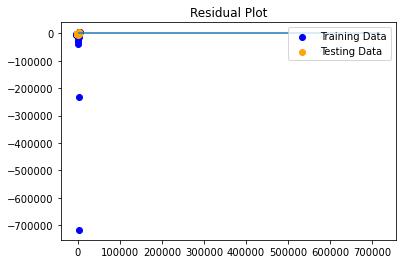

In [35]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
## END SOLUTION